In [1]:
# importing useful libs on the go
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
import math
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import collections
from sklearn.grid_search import GridSearchCV

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

% matplotlib inline

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
train = pd.read_csv('train_mod.csv')

In [3]:
y = train['return']

In [4]:
test = pd.read_csv('test_mod.csv')

In [5]:
test_ID = test['portfolio_id']

In [6]:
train.drop('portfolio_id',axis=1,inplace=True)
test.drop('portfolio_id',axis=1,inplace=True)

In [7]:
train.drop('desk_id',axis=1,inplace=True)
test.drop('desk_id',axis=1,inplace=True)

In [8]:
train.fillna(-99999,inplace=True)
test.fillna(-99999,inplace=True)

In [9]:
X = train.drop('return',axis=1)

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
X_tr , X_te , y_tr , y_te = train_test_split(X,y,test_size=0.2)

In [58]:
reg=RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=5,n_jobs=-1)

In [63]:
reg=RandomForestRegressor(n_estimators=200, criterion='mse', max_depth=12,n_jobs=-1)

In [64]:
reg.fit(X_tr,y_tr)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

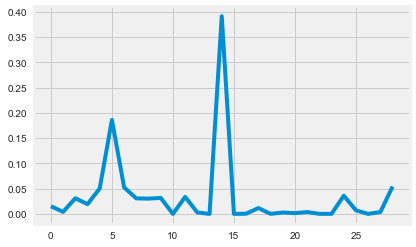

In [65]:
plt.plot(reg.feature_importances_)

In [67]:
r2_score(y_te, reg.predict(X_te))

0.96318832822622102

In [66]:
from sklearn.metrics import r2_score

In [81]:
reg=RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=10,n_jobs=-1,min_samples_leaf=3,min_samples_split=5)

In [82]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=43,shuffle=True)


In [83]:
for train_index, test_index in skf.split(X, y):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    print r2_score(y_test, pred)
    

0.970259856622
0.939338023689
0.966793409718
0.970515380466
0.841271779572
0.964828719058
0.348640012199
0.846045191965
0.976243604175
0.992422322775


In [92]:
from sklearn.linear_model import LogisticRegression

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lr = LinearRegression(n_jobs=-1)

In [98]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=43,shuffle=True)


In [99]:
for train_index, test_index in skf.split(X, y):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    print r2_score(y_test, pred)
    

0.904838836897
0.894996869774
0.901511236176
0.905298147866
0.791126640258
0.89355980636
0.304489365307
0.804216383495
0.914247155333
0.921644565559


In [84]:
reg.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=3,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [85]:
pred = reg.predict(test)

In [86]:
ans = test.copy()

In [87]:
ans['return'] = pred

In [88]:
ans['portfolio_id'] = test_ID

In [89]:
ans = ans[['portfolio_id','return']]

In [90]:
ans.to_csv('submit.csv',index=False)